### Convert a 100x100 grayscale PNG file to a line for a dataset.
The dataset is a CSV file whose columns contain:

•.  The name of the file;

•.  10000 grayscale pixel values, each a single int;

•.  The letter represented by the cell (user is promoted to enter this,
after cell is displayed)

In [15]:
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re

In [16]:
def readFile(fname):
    with open(fname) as f:
        f0 = f.readlines()
    f_stripped = [l.lstrip('"').rstrip('\",\n\};') for l in f0]
    return f_stripped 

In [17]:
def makeLabelDict(filedata):
    '''keys are XPM pixel lebels; values are the integer value of a pixel color's first 2 hex digits'''
    labeldict = {}
    for line in filedata:
        match = re.search(r'(.+) c \#(..)', line)
        if match:
            labeldict[match.group(1)] = str(int(match.group(2), 16))
    return labeldict  

In [18]:
def get_xpm_attributes(fdata):
    '''Get XPM height, width, chars_per_pixel from XPM defs line'''
    for i in range(len(fdata)):
        m = re.search('\d+\ +\d+\ +\d+\ +\d+', fdata[i])
        if m:
            return [int(x) for x in re.findall('\d+', m.group(0))]

In [19]:
def getPixelValues(fdata, labeldict, width, chars_per_pixel):
    '''Make comma-separated string of all of the pixels' values '''
    values_str = ''
    pixlabel_re = '.{' + str(chars_per_pixel) + '}'
    for i in range(len(fdata)):
        if len(fdata[i]) == width * chars_per_pixel:
            for pixel_label in re.findall(pixlabel_re, fdata[i]):
                values_str += labeldict[pixel_label] + ','

    return values_str

In [20]:
def get_letter_from_user(csv_line):
    '''Display the cell and have user enter the letter that it represents'''
    letter = '_'
    csv_array = DataFrame([float(num) for num in (csv_line.split(",")[1:-1])])
    
    plt.figure()
    plt.imshow(csv_array.values.reshape(100, 100), cmap ='gray')
    
    plt.title("Close me then follow the prompt!")
    plt.show()
    return input("What was the letter? ")

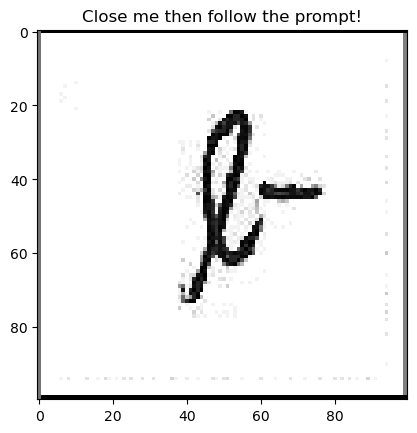

What was the letter? b


'single-letter-0-100.xpm,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,128,116,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,2

In [21]:
fname = "single-letter-0-100.xpm"
csv_line = fname + ","

fdata = readFile(fname)
assert len(fdata) > 0

labeldict = makeLabelDict(fdata)
assert labeldict != {}

width, height, ncolors, chars_per_pixel = get_xpm_attributes(fdata)
assert len(labeldict.keys()) == ncolors

csv_line += getPixelValues(fdata, labeldict, width, chars_per_pixel)
csv_line += get_letter_from_user(csv_line)
csv_line